In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
from platform import python_version
print(python_version())

3.9.7


In [7]:
import tensorflow as tf

In [8]:
tf.__version__

'2.8.0'

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [10]:
# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units = 128, activation='relu'))

classifier.add(Dense(units=1, activation='sigmoid'))

In [11]:
# Compiling the CNN

classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                  metrics = ['accuracy'])

In [12]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Getting from directory

training_set = train_datagen.flow_from_directory('dogcat/cats_and_dogs_filtered/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')


test_set = test_datagen.flow_from_directory('dogcat/cats_and_dogs_filtered/validation',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
# Fit Generator is used when all the data/images cannot be put into the ram all at once
# It will break 1 Epoch into many steps

model = classifier.fit_generator(training_set, 
                                steps_per_epoch = 62,
                                epochs = 10,
                                validation_data = test_set,
                                validation_steps = 2000)

C:\Users\AMMARA~1\AppData\Local\Temp/ipykernel_9032/3590501086.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model = classifier.fit_generator(training_set,


Epoch 1/10
62/62 [==============================] - 21s 344ms/step - loss: 0.4523 - accuracy: 0.7922 - val_loss: 0.5898 - val_accuracy: 0.7170
Epoch 2/10
62/62 [==============================] - 16s 258ms/step - loss: 0.4249 - accuracy: 0.8018
Epoch 3/10
62/62 [==============================] - 16s 258ms/step - loss: 0.4203 - accuracy: 0.8135
Epoch 4/10
62/62 [==============================] - 16s 261ms/step - loss: 0.4240 - accuracy: 0.8003
Epoch 5/10
62/62 [==============================] - 16s 260ms/step - loss: 0.4027 - accuracy: 0.8074
Epoch 6/10
62/62 [==============================] - 16s 257ms/step - loss: 0.3928 - accuracy: 0.8211
Epoch 7/10
62/62 [==============================] - 16s 257ms/step - loss: 0.4114 - accuracy: 0.8135
Epoch 8/10
62/62 [==============================] - 16s 257ms/step - loss: 0.3791 - accuracy: 0.8323
Epoch 9/10
62/62 [==============================] - 18s 289ms/step - loss: 0.3847 - accuracy: 0.8420
Epoch 10/10
62/62 [==============================

In [22]:
2000/32

62.5

In [ ]:
classifier.save("model.h5")
print('Model Saved to Disk')

In [14]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

In [15]:
loaded_model = load_model('model.h5')

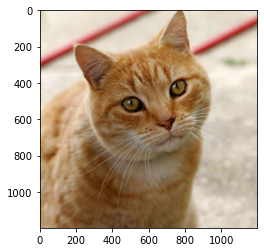

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

dog_image = mpimg.imread('Cat_test.jpg')

plt.imshow(dog_image)

In [94]:
def finder(image_name):
    test_image = image.load_img(image_name, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    
    dog_image = mpimg.imread(image_name)

    plt.imshow(dog_image)

    if round(result[0][0]) == 1:
        prediction = 'Its a Dog!'
        print(prediction)
    else:
        prediction = 'Its a Cat!'
        print(prediction)
    
    print(result)

Its a Dog!
[[1.]]


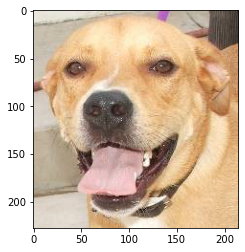

In [95]:
finder('dogcat/cats_and_dogs_filtered/validation/dogs/dog.2001.jpg')

#"F:\Computer Vision\Computer Vision Notebooks\dogcat\cats_and_dogs_filtered\validation\cats\cat.2019.jpg"

Its a Cat!
[[0.]]


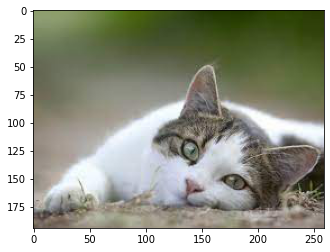

In [97]:
finder('images.jfif')

In [57]:
test_image = image.load_img('Cat_test.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)

In [60]:
test_image.shape

(1, 64, 64, 3)

1.0

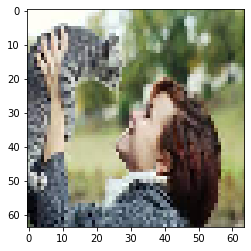

In [70]:
test_image = image.load_img('last_cat.jfif', target_size = (64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
result[0][0]

In [81]:
test_image = image.load_img('cat10.jfif', target_size = (64, 64))
test_image = image.img_to_array(test_image)

In [82]:
test_image.shape

(64, 64, 3)

In [37]:
import matplotlib.pyplot as plt

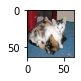

Its a Cat!
[[0.4725802]]


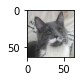

Its a Cat!
[[0.08927312]]


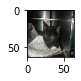

Its a Cat!
[[0.26029754]]


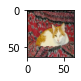

Its a Dog!
[[0.84733945]]


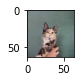

Its a Cat!
[[0.23482618]]


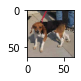

Its a Dog!
[[0.8439234]]


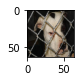

Its a Dog!
[[0.99388385]]


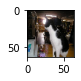

Its a Dog!
[[0.96901107]]


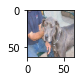

Its a Cat!
[[0.4681256]]


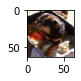

Its a Dog!
[[0.88672996]]


In [78]:
i = 0
for _ in range(10):
    img, label = test_set.next()
    #print(img.shape)
    i=i+1
    plt.figure(figsize=(5,5))
    plt.subplot(5,2,i)
    plt.imshow(img[0])
    plt.show()
    

    test_image = np.expand_dims(img[0], axis = 0)
    result = loaded_model.predict(test_image)
    
    if round(result[0][0]) == 1:
        prediction = 'Its a Dog!'
        print(prediction)
    else:
        prediction = 'Its a Cat!'
        print(prediction)
    
    print(result)